### Exercise 11.2

Si vuole ora fittare il seguente polinomio di terzo grado:

$$
f(x)=4-3x-2x^2+3x^3
$$
per $x \in [-1,1]$.


In [23]:
# target parameters of f(x) = a*x**3 +b*x**2 + c*x +d
a = 3 
b = -2 
c = -3
d = 4

In [24]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)   #genero 10000 numeri casuali tra -1 e 1 (train set)
x_valid = np.random.uniform(-1, 1, 1000)    #genero 1000 numeri casuali tra -1 e 1 (validation set)
x_valid.sort()                            #ordino gli elementi
y_target = a * x_valid **3 + b * x_valid **2 +c * x_valid + d # ideal (target) function

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(a * x_train **3 + b * x_train **2 +c * x_train + d, sigma) 
y_valid = np.random.normal(a * x_valid **3 + b * x_valid **2 +c * x_valid + d, sigma)

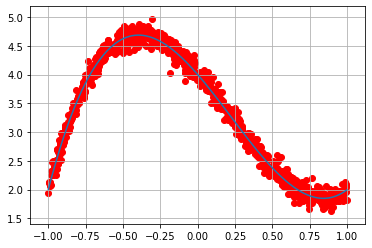

In [25]:
#plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

Per affrontare questo tipo di problema è necessario costruire una rete neurale con un grado di complessità più elevato. 

In [26]:
import tensorflow as tf
from tensorflow import keras

model1=tf.keras.models.load_model(filepath='Modelli/Saved/model_1')
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 6         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


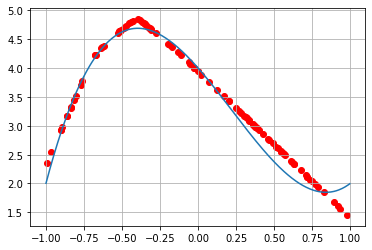

In [27]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model1.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

La rete costruita approssima il polinomio con una retta spezzata. Per ottenere risultati più accurati creo delle reti con un'architettura più complessa.

In [28]:
model2=tf.keras.models.load_model(filepath='Modelli/Saved/model_2')
model3=tf.keras.models.load_model(filepath='Modelli/Saved/model_3')
model4=tf.keras.models.load_model(filepath='Modelli/Saved/model_4')
model2.summary()
model3.summary()
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 3)                 6         
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                

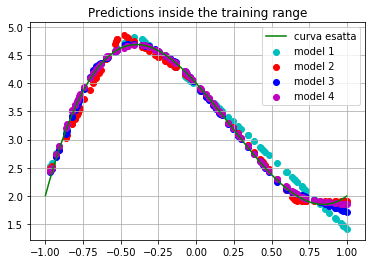

In [29]:
x_predicted = np.random.uniform(-1, 1, 100)
y1_predicted = model1.predict(x_predicted)
y2_predicted = model2.predict(x_predicted)
y3_predicted = model3.predict(x_predicted)
y4_predicted = model4.predict(x_predicted)
plt.scatter(x_predicted, y1_predicted,color='c', label ='model 1')
plt.scatter(x_predicted, y2_predicted,color='r', label ='model 2')
plt.scatter(x_predicted, y3_predicted,color='b', label ='model 3')
plt.scatter(x_predicted, y4_predicted,color='m', label ='model 4')
plt.plot(x_valid, y_target, color='g', label='curva esatta')
plt.title('Predictions inside the training range')
plt.legend()
plt.grid(True)
plt.show()

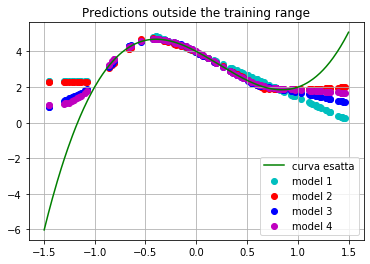

In [30]:
x_valid = np.random.uniform(-1.5, 1.5, 1000)
x_valid.sort()  
y_target = a * x_valid **3 + b * x_valid **2 +c * x_valid + d # ideal
x_predicted = np.random.uniform(-1.5, 1.5, 100)
y1_predicted = model1.predict(x_predicted)
y2_predicted = model2.predict(x_predicted)
y3_predicted = model3.predict(x_predicted)
y4_predicted = model4.predict(x_predicted)
plt.scatter(x_predicted, y1_predicted,color='c',label ='model 1')
plt.scatter(x_predicted, y2_predicted,color='r',label ='model 2')
plt.scatter(x_predicted, y3_predicted,color='b',label ='model 3')
plt.scatter(x_predicted, y4_predicted,color='m',label ='model 4')
plt.plot(x_valid, y_target, color='g', label='curva esatta')
plt.title('Predictions outside the training range')
plt.legend()
plt.grid(True)
plt.show()

Anche la rete con più parametri non riesce ad approssimare il polinomio al di fuori del range di addestramento. Una buona approssimazione della curva nell'intervallo in cui la rete è stata addestrata non garantisce la capacità del modello di fare previsioni al di fuori del range di training.

Studio ora come cambiano i risultati dati dalla rete più semplice quando sottoposta ad un addestramento più lungo.

In [31]:
model1_50e=tf.keras.models.load_model(filepath='Modelli/Saved/model_1_50e')

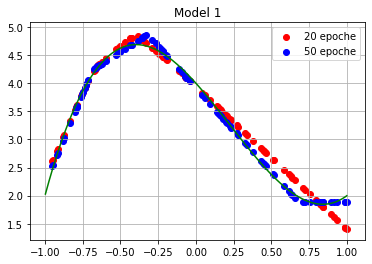

In [32]:
x_valid = np.random.uniform(-1, 1, 1000)
x_valid.sort()  
y_target = a * x_valid **3 + b * x_valid **2 +c * x_valid + d # ideal
x_predicted = np.random.uniform(-1, 1, 100)
y1_predicted = model1.predict(x_predicted)
y1_50e_predicted = model1_50e.predict(x_predicted)

plt.scatter(x_predicted, y1_predicted,color='r', label='20 epoche')
plt.scatter(x_predicted, y1_50e_predicted,color='b',label='50 epoche')
plt.plot(x_valid, y_target, color='g')
plt.title('Model 1')
plt.legend()
plt.grid(True)
plt.show()

Aumentando il numero di epoche la rete approssima meglio il polinomio.

Studio infine come cambiano i risultati della rete più complessa utilizzando ottimizzatori diversi.

In [33]:
model4_Adagrad=tf.keras.models.load_model(filepath='Modelli/Saved/model_4_Adagrad')
model4_Nadam=tf.keras.models.load_model(filepath='Modelli/Saved/model_4_Nadam')
model4_Adadelta=tf.keras.models.load_model(filepath='Modelli/Saved/model_4_Adadelta')

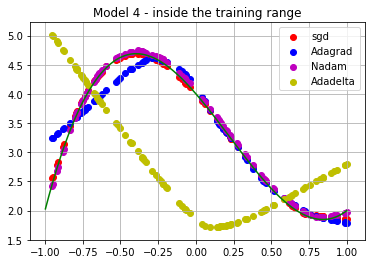

In [34]:
y4_predicted = model4.predict(x_predicted)
y4_Adagrad_predicted = model4_Adagrad.predict(x_predicted)
y4_Nadam_predicted = model4_Nadam.predict(x_predicted)
y4_Adadelta_predicted = model4_Adadelta.predict(x_predicted)

plt.scatter(x_predicted, y4_predicted,color='r', label='sgd')
plt.scatter(x_predicted, y4_Adagrad_predicted,color='b', label='Adagrad')
plt.scatter(x_predicted, y4_Nadam_predicted,color='m', label='Nadam')
plt.scatter(x_predicted, y4_Adadelta_predicted,color='y', label='Adadelta')

plt.plot(x_valid, y_target, color='g')
plt.title('Model 4 - inside the training range')
plt.legend()
plt.grid(True)
plt.show()

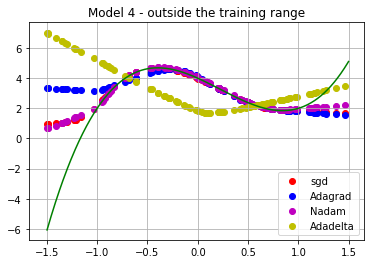

In [35]:
x_valid = np.random.uniform(-1.5, 1.5, 1000)
x_valid.sort()  
y_target = a * x_valid **3 + b * x_valid **2 +c * x_valid + d # ideal
x_predicted = np.random.uniform(-1.5, 1.5, 100)
y4_predicted = model4.predict(x_predicted)
y4_Adagrad_predicted = model4_Adagrad.predict(x_predicted)
y4_Nadam_predicted = model4_Nadam.predict(x_predicted)
y4_Adadelta_predicted = model4_Adadelta.predict(x_predicted)
plt.scatter(x_predicted, y4_predicted,color='r', label='sgd')
plt.scatter(x_predicted, y4_Adagrad_predicted,color='b', label='Adagrad')
plt.scatter(x_predicted, y4_Nadam_predicted,color='m', label='Nadam')
plt.scatter(x_predicted, y4_Adadelta_predicted,color='y', label='Adadelta')

plt.plot(x_valid, y_target, color='g')
plt.title('Model 4 - outside the training range')
plt.legend()
plt.grid(True)
plt.show()

Utilizzando ottimizzatori diversi le performances della rete cambiano notevolmente. Adadelta in questo caso risulta essere quello meno adatto, mentre Nadam e Sgd quelli che permettono di ottenere previsioni migliori.